In [1]:
import pymssql
import pandas as pd

Read In Tables From Database

In [2]:
database = "group4"
mortalityTable = "dbo.mortality"
underweightTable = "dbo.underweight"
waterTable = "dbo.water"
malariaTable = "dbo.malaria"
tbTable = "dbo.tb"
user = "group4user"
password  = "everythingIsAwesome!"
server = "database2108.database.windows.net"

In [3]:
conn = pymssql.connect(server, user, password, database)

dfMortal = pd.read_sql(f"SELECT * FROM {mortalityTable}", conn)
dfUnder = pd.read_sql(f"SELECT * FROM {underweightTable}", conn)
dfWater = pd.read_sql(f"SELECT * FROM {waterTable}", conn)
dfMalaria = pd.read_sql(f"SELECT * FROM {malariaTable}", conn)
dfTb = pd.read_sql(f"SELECT * FROM {tbTable}", conn)

display(dfMortal)
display(dfUnder)
display(dfWater)
display(dfMalaria)
display(dfTb)

,Country,Year,PercentMortality
0,AFG,2000,31.6
1,AFG,2001,30.7
2,AFG,2002,29.2
3,AFG,2003,28.6
4,AFG,2004,28.2
...,...,...,...
3106,ZWE,2012,40.7
3107,ZWE,2013,38.3
3108,ZWE,2014,35.8
3109,ZWE,2015,34.6


,Country,PercentUnderweightAdults,Year
0,AFG,22.000000,2000
1,AFG,21.600000,2001
2,AFG,21.299999,2002
3,AFG,20.900000,2003
4,AFG,20.600000,2004
...,...,...,...
3293,ZWE,8.300000,2012
3294,ZWE,8.200000,2013
3295,ZWE,8.100000,2014
3296,ZWE,8.000000,2015


,Country,Year,PercentWater
0,AFG,2000,28.171419
1,AFG,2001,28.199369
2,AFG,2002,30.236380
3,AFG,2003,32.273720
4,AFG,2004,34.328560
...,...,...,...
4111,ZWE,2016,64.468964
4112,ZWE,2017,63.996620
4113,ZWE,2018,63.538769
4114,ZWE,2019,63.094959


,Country,Year,PercentMalaria
0,ABW,2000,0.0
1,ABW,2001,0.0
2,ABW,2002,0.0
3,ABW,2003,0.0
4,ABW,2004,0.0
...,...,...,...
4955,ZWE,2015,9.7
4956,ZWE,2016,6.8
4957,ZWE,2017,11.7
4958,ZWE,2018,5.5


,Country,Year,PercentTb
0,AFG,2000,0.190
1,AFG,2001,0.189
2,AFG,2002,0.189
3,AFG,2003,0.189
4,AFG,2004,0.189
...,...,...,...
3459,ZWE,2016,0.233
3460,ZWE,2017,0.221
3461,ZWE,2018,0.210
3462,ZWE,2019,0.199


Joined Tables To Create Features Table

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

joined = dfWater.merge(dfUnder, on = ["Country", "Year"]) \
                .merge(dfMortal, on = ["Country", "Year"]) \
                .merge(dfMalaria, on = ["Country", "Year"]) \
                .merge(dfTb, on = ["Country", "Year"])

display(joined)

,Country,Year,PercentWater,PercentUnderweightAdults,PercentMortality,PercentMalaria,PercentTb
0,AFG,2000,28.171419,22.000000,31.6,8.2,0.190
1,AFG,2001,28.199369,21.600000,30.7,7.9,0.189
2,AFG,2002,30.236380,21.299999,29.2,7.9,0.189
3,AFG,2003,32.273720,20.900000,28.6,6.8,0.189
4,AFG,2004,34.328560,20.600000,28.2,3.7,0.189
...,...,...,...,...,...,...,...
3083,ZWE,2012,66.491180,8.300000,40.7,5.7,0.355
3084,ZWE,2013,65.966469,8.200000,38.3,8.1,0.304
3085,ZWE,2014,65.454109,8.100000,35.8,10.1,0.278
3086,ZWE,2015,64.954933,8.000000,34.6,9.7,0.242


Split Set into Training and Testing Sets

In [79]:
from sklearn.model_selection import train_test_split
X = joined.drop(["Country", "Year", "PercentMortality"], axis = 1)
y = joined["PercentMortality"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0)

Run Grid Search on Best Performing Model from Manual Tests

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
# Capped Number of Estimators to 150 so training times don't get too long
estimators = np.linspace(60, 150, 10, dtype = int)
parameters = {'random_state': [0], 'n_estimators': estimators,
              'criterion': ["squared_error", "absolute_error"]}
clf = GridSearchCV(ExtraTreesRegressor(), parameters, verbose = 4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=squared_error, n_estimators=60, random_state=0;, score=0.946 total time=   0.1s
[CV 2/5] END criterion=squared_error, n_estimators=60, random_state=0;, score=0.934 total time=   0.2s
[CV 3/5] END criterion=squared_error, n_estimators=60, random_state=0;, score=0.958 total time=   0.1s
[CV 4/5] END criterion=squared_error, n_estimators=60, random_state=0;, score=0.944 total time=   0.2s
[CV 5/5] END criterion=squared_error, n_estimators=60, random_state=0;, score=0.967 total time=   0.3s
[CV 1/5] END criterion=squared_error, n_estimators=70, random_state=0;, score=0.945 total time=   0.2s
[CV 2/5] END criterion=squared_error, n_estimators=70, random_state=0;, score=0.934 total time=   0.2s
[CV 3/5] END criterion=squared_error, n_estimators=70, random_state=0;, score=0.959 total time=   0.2s
[CV 4/5] END criterion=squared_error, n_estimators=70, random_state=0;, score=0.944 total time=   0.2s
[CV 5/5] EN

[CV 5/5] END criterion=absolute_error, n_estimators=110, random_state=0;, score=0.965 total time=   6.8s
[CV 1/5] END criterion=absolute_error, n_estimators=120, random_state=0;, score=0.947 total time=   7.3s
[CV 2/5] END criterion=absolute_error, n_estimators=120, random_state=0;, score=0.936 total time=   7.1s
[CV 3/5] END criterion=absolute_error, n_estimators=120, random_state=0;, score=0.960 total time=   7.6s
[CV 4/5] END criterion=absolute_error, n_estimators=120, random_state=0;, score=0.948 total time=   7.5s
[CV 5/5] END criterion=absolute_error, n_estimators=120, random_state=0;, score=0.966 total time=   8.6s
[CV 1/5] END criterion=absolute_error, n_estimators=130, random_state=0;, score=0.946 total time=   9.9s
[CV 2/5] END criterion=absolute_error, n_estimators=130, random_state=0;, score=0.936 total time=   7.6s
[CV 3/5] END criterion=absolute_error, n_estimators=130, random_state=0;, score=0.960 total time=   8.6s
[CV 4/5] END criterion=absolute_error, n_estimators=130

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'n_estimators': array([ 60,  70,  80,  90, 100, 110, 120, 130, 140, 150]),
                         'random_state': [0]},
             verbose=4)

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
0.9654041808432126


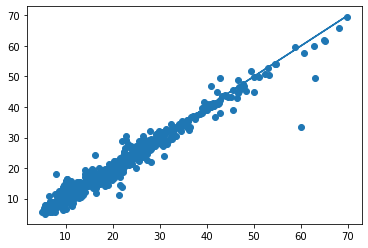

In [84]:
import matplotlib.pyplot as plt
bclf = clf.best_estimator_
print(bclf.get_params())
bclf.fit(X_train, y_train)
print(bclf.score(X_test, y_test))

prediction = bclf.predict(X_test)
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test)

Export Best Found Model from the Grid Search

In [ ]:
import pickle
pickle.dump(bclf, open("./Model/extratrees.pkl", "wb"))

Manual Tests of Other Models

0.8759950159415053


C:\Users\agang_drcif5q\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\agang_drcif5q\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


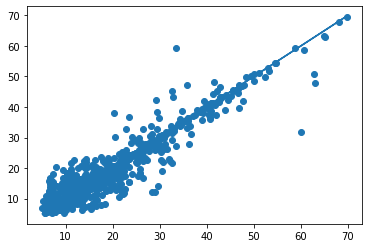

In [71]:
# from sklearn.neighbors import KNeighborsRegressor
# knr = KNeighborsRegressor(n_neighbors = 2, weights = "distance", p = 1)
# knr.fit(X_train, y_train)

# print(knr.score(X_test, y_test))

# prediction = knr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

C:\Users\agang_drcif5q\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RadiusNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\agang_drcif5q\miniconda3\lib\site-packages\sklearn\neighbors\_regression.py:474: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


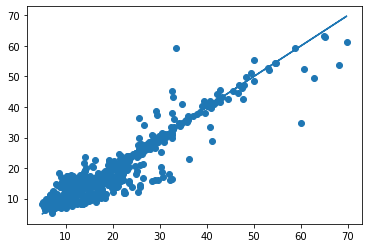

In [65]:
# from sklearn.neighbors import RadiusNeighborsRegressor
# rnr = RadiusNeighborsRegressor(radius = 4, weights = "distance", p = 1)
# rnr.fit(X_train, y_train)

# # print(rnr.score(X_test, y_test))

# prediction = rnr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

In [ ]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# gpr = GaussianProcessRegressor(alpha = 0.01, random_state = 0)
# gpr.fit(X_train, y_train)

# print(gpr.score(X_test, y_test))

# prediction = gpr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# dtr = DecisionTreeRegressor(random_state = 0, criterion = "absolute_error", min_samples_split = 5)
# dtr.fit(X_train, y_train)

# print(dtr.score(X_test, y_test))

# prediction = dtr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# rfr = RandomForestRegressor(random_state = 0, n_estimators = 80, criterion = "absolute_error")
# rfr.fit(X_train, y_train)

# print(rfr.score(X_test, y_test))

# prediction = rfr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# gbr = GradientBoostingRegressor(random_state = 0, loss = "squared_error",
#                                 n_estimators = 500, learning_rate = 0.5)
# gbr.fit(X_train, y_train)

# print(gbr.score(X_test, y_test))

# prediction = gbr.predict(X_test)
# plt.scatter(y_test, prediction)
# plt.plot(y_test, y_test)